In [43]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import datetime as dt
import pandas as pd
import numpy as np

In [32]:
df = pd.read_csv('../UF data/UF 1990-2022.csv')
df

,date,clfclp
0,1990-01-01,5435.28
1,1990-01-02,5438.23
2,1990-01-03,5441.19
3,1990-01-04,5444.15
4,1990-01-05,5447.11
...,...,...
11904,2022-08-05,33465.59
11905,2022-08-06,33475.26
11906,2022-08-07,33484.94
11907,2022-08-08,33494.62


In [33]:
def add_ordinal_date(df, date):
    df_output = df[df.date>=date].copy(deep=True)
    df_output['date'] = pd.to_datetime(df_output['date'])
    df_output['ordinal_date']=df_output['date'].map(dt.datetime.toordinal)
    return df_output

In [36]:
filtered_df = add_ordinal_date(df_2022,'2022-01-01')
filtered_df

,date,clfclp,ordinal_date
11688,2022-01-01,30996.73,738156
11689,2022-01-02,31001.72,738157
11690,2022-01-03,31006.71,738158
11691,2022-01-04,31011.69,738159
11692,2022-01-05,31016.68,738160
...,...,...,...
11904,2022-08-05,33465.59,738372
11905,2022-08-06,33475.26,738373
11906,2022-08-07,33484.94,738374
11907,2022-08-08,33494.62,738375


In [51]:
X_train, X_test, y_train, y_test = train_test_split(
    filtered_df[['ordinal_date']], filtered_df[['clfclp']], test_size=0.33, random_state=42)

reg = LinearRegression().fit(X_train.values, y_train)

# Make predictions using the testing set
y_pred = reg.predict(X_test.values)

# The coefficients
print("Coefficients: \n", reg.intercept_, reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficients: 
 [-8994549.98196372] [[12.22690643]]
Mean squared error: 9481.19
Coefficient of determination: 0.98


In [52]:
dateee = dt.datetime.toordinal(dt.datetime(2022,12,24))
uf_navidad = reg.predict([[dateee]])

In [53]:
uf_navidad

array([[35179.36957432]])

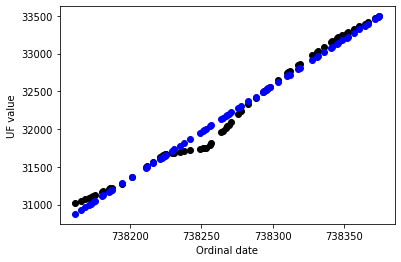

In [55]:
# Plot outputs
plt.scatter(X_test, y_test, color="black")
plt.scatter(X_test, y_pred, color="blue")

plt.xlabel('Ordinal date')
plt.ylabel('UF value')

plt.show()